## DATA 1030 Final Project

## Name: Vaishu Chintam

## Link to your github repo: https://github.com/vaishuc17/data1030finalproject.git

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# read in the dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print(f"There are {df.shape[0]} rows of data and {df.shape[1]} features in the dataset\n")
# turn all values into integers since they are all whole numbers and floats take up extra memory
df = df.astype('int64')
print(df.head())
# prepare the feature matrix X
X = df.loc[:, df.columns != 'Diabetes_012']
# prepare the target variable y
y = df['Diabetes_012']

There are 253680 rows of data and 22 features in the dataset

   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2             0       1         1          1   28       0       0   
3             0       1         0          1   27       0       0   
4             0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5       

## Exploratory Data Analysis

### Summary Statistics

In [2]:
# display columns and dtypes
df.info()

# calculate num of missing values per col 
print(f"\nNumber of missing values per column:\n{df.isna().sum()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [3]:
# call describe() and value_counts() on all features to get a better understanding of them
for col in df.columns:
    print(df[col].describe(), "\n")
    print(df[col].value_counts(), "\n")

count    253680.000000
mean          0.296921
std           0.698160
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Diabetes_012, dtype: float64 

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64 

count    253680.000000
mean          0.429001
std           0.494934
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighBP, dtype: float64 

HighBP
0    144851
1    108829
Name: count, dtype: int64 

count    253680.000000
mean          0.424121
std           0.494210
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighChol, dtype: float64 

HighChol
0    146089
1    107591
Name: count, dtype: int64 

count    253680.000000
mean          0.962670
std           0.189571
min           0.000000
25%           1.000000
50%           1.000000
75%         

### Visualizations

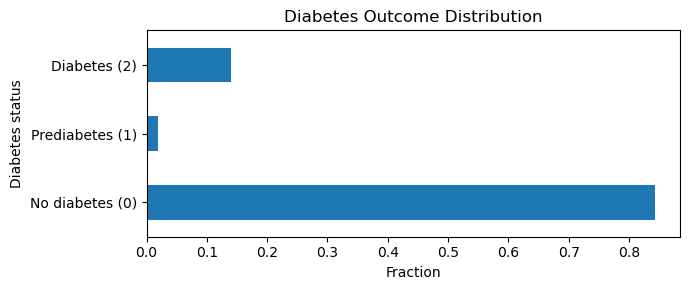

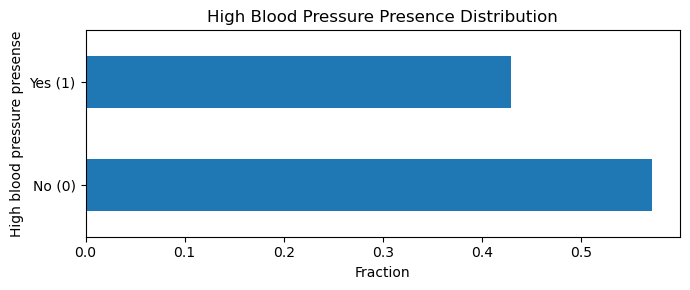

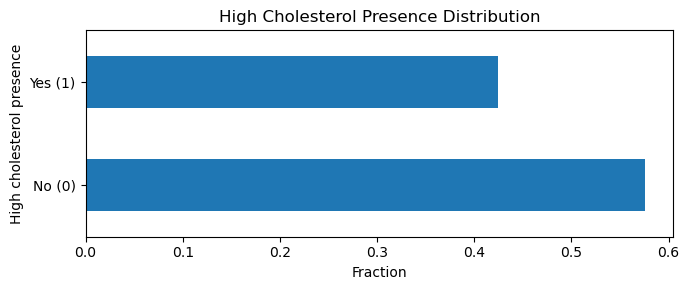

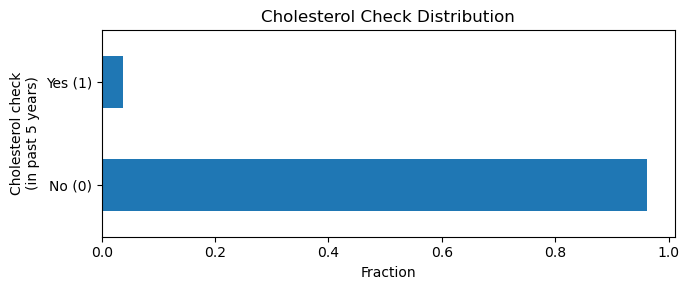

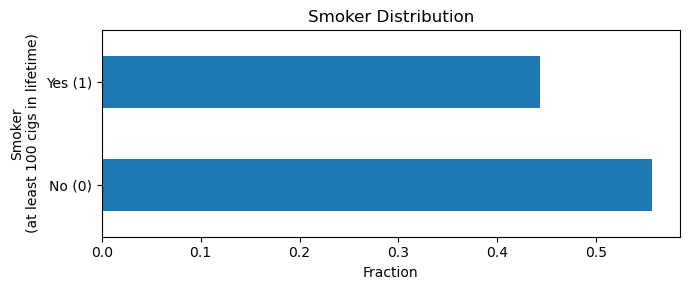

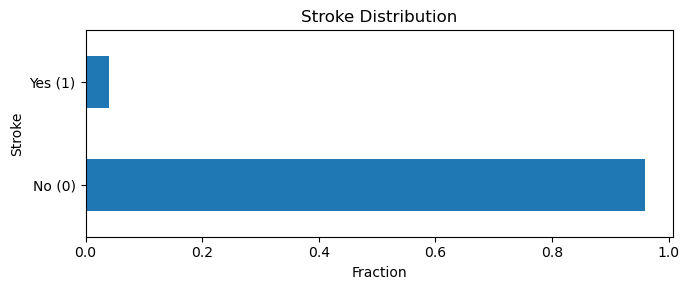

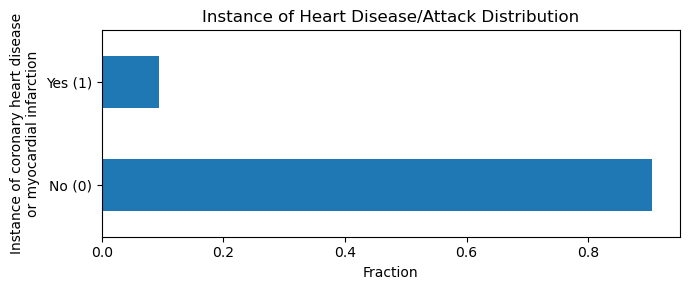

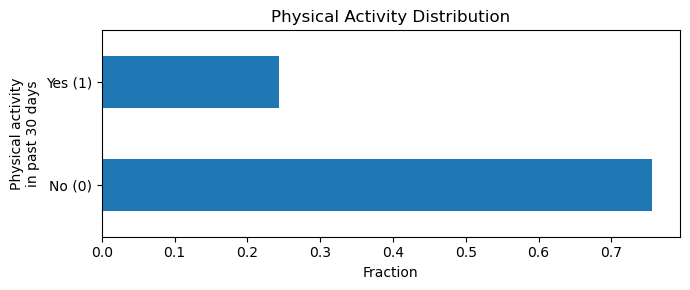

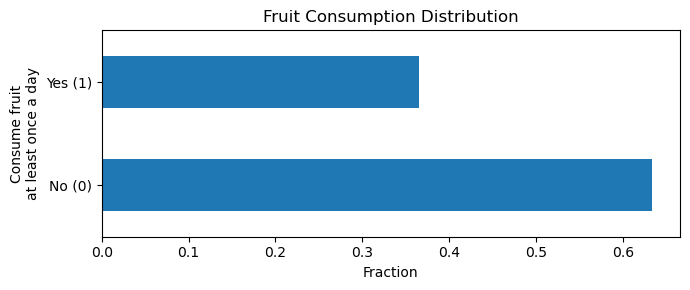

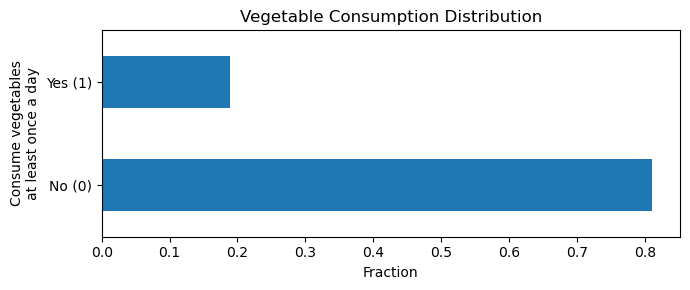

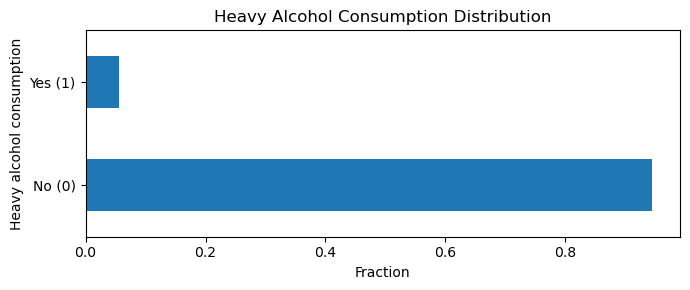

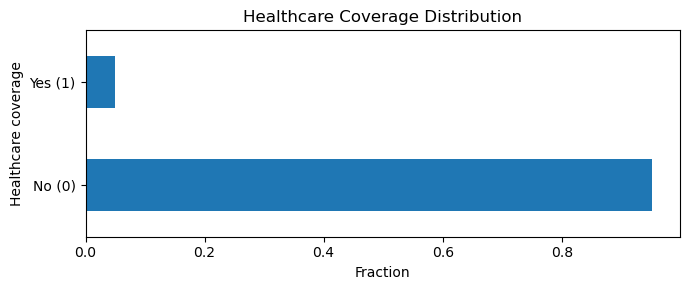

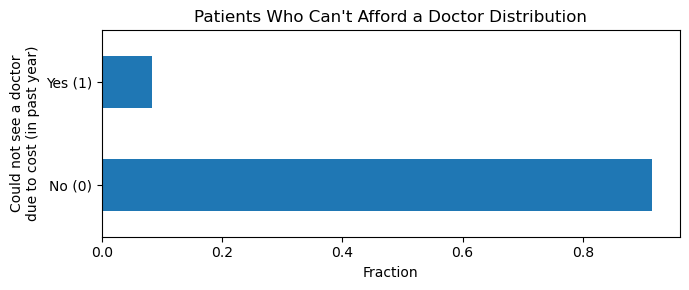

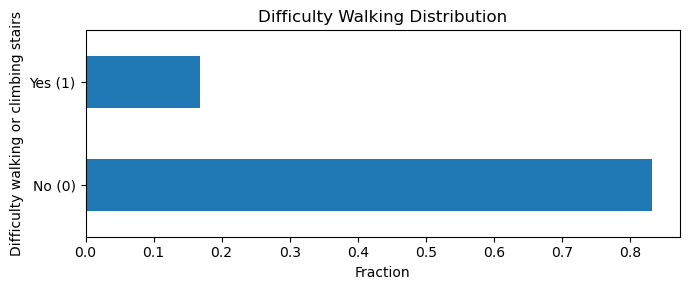

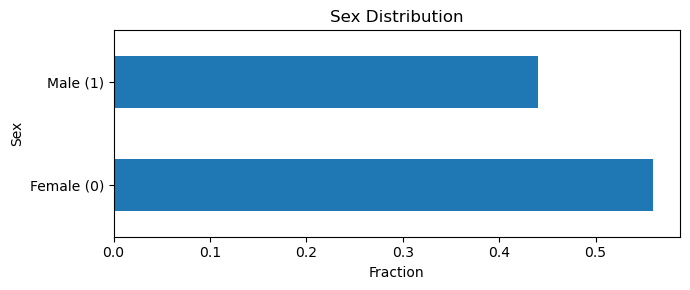

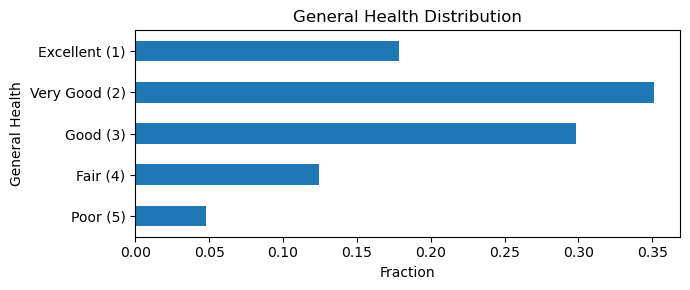

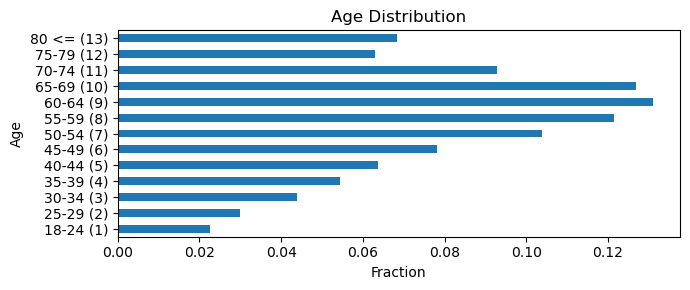

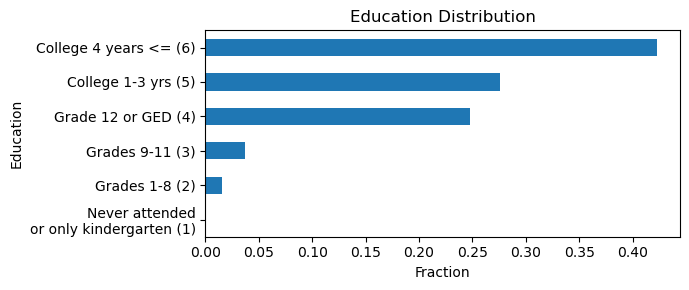

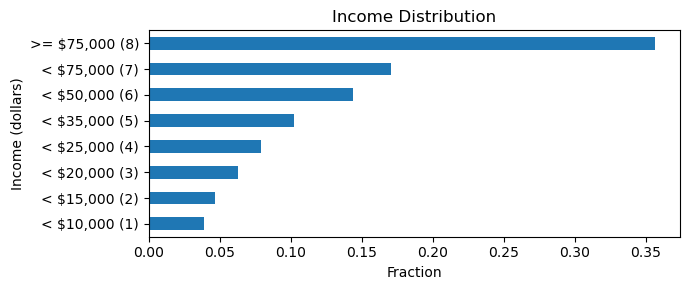

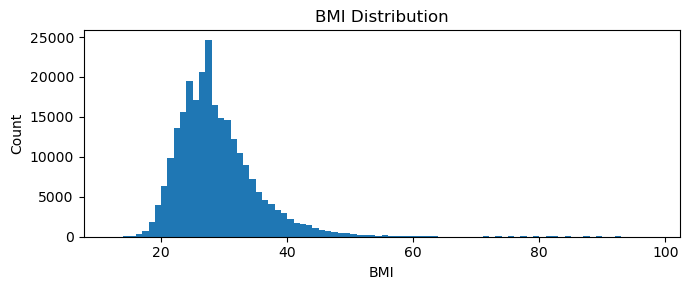

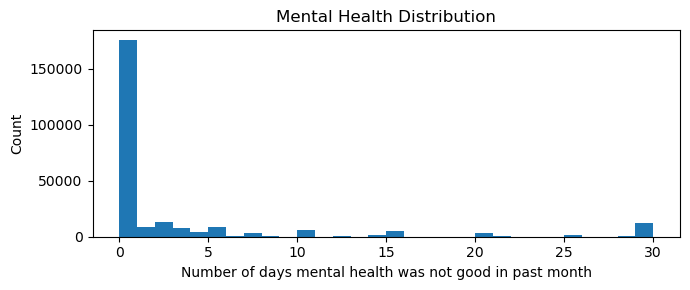

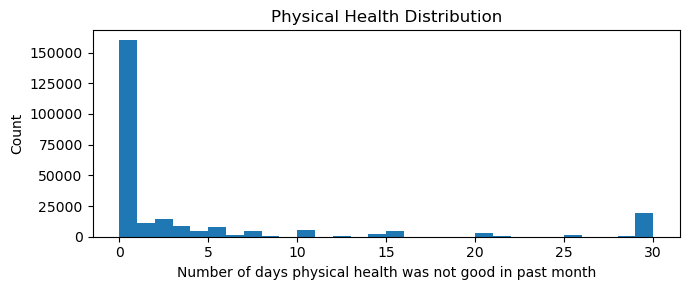

In [4]:
# visualize target variable
plt.figure(figsize=(7,3))
df['Diabetes_012'].value_counts(normalize=True).reindex([0,1,2]).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1,2], ['No diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)'])
plt.ylabel('Diabetes status')
plt.title('Diabetes Outcome Distribution')
plt.tight_layout() 
plt.savefig("target_variable.jpg", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

# visualize all other features
# HighBP
plt.figure(figsize=(7,3))
df['HighBP'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('High blood pressure presense')
plt.title('High Blood Pressure Presence Distribution')
plt.tight_layout() 
plt.show()

# HighChol
plt.figure(figsize=(7,3))
df['HighChol'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('High cholesterol presence')
plt.title('High Cholesterol Presence Distribution')
plt.tight_layout() 
plt.show()

# CholCheck
plt.figure(figsize=(7,3))
df['CholCheck'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Cholesterol check\n(in past 5 years)')
plt.title('Cholesterol Check Distribution')
plt.tight_layout() 
plt.show()

# Smoker
plt.figure(figsize=(7,3))
df['Smoker'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Smoker\n(at least 100 cigs in lifetime)')
plt.title('Smoker Distribution')
plt.tight_layout() 
plt.show()

# Stroke
plt.figure(figsize=(7,3))
df['Stroke'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Stroke')
plt.title('Stroke Distribution')
plt.tight_layout() 
plt.show()

# HeartDiseaseorAttack
plt.figure(figsize=(7,3))
df['HeartDiseaseorAttack'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Instance of coronary heart disease\nor myocardial infarction')
plt.title('Instance of Heart Disease/Attack Distribution')
plt.tight_layout() 
plt.show()

# PhysActivity
plt.figure(figsize=(7,3))
df['PhysActivity'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Physical activity\nin past 30 days')
plt.title('Physical Activity Distribution')
plt.tight_layout() 
plt.show()

# Fruits
plt.figure(figsize=(7,3))
df['Fruits'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Consume fruit\nat least once a day')
plt.title('Fruit Consumption Distribution')
plt.tight_layout() 
plt.show()

# Veggies
plt.figure(figsize=(7,3))
df['Veggies'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Consume vegetables\nat least once a day')
plt.title('Vegetable Consumption Distribution')
plt.tight_layout() 
plt.show()

# HvyAlcoholConsump
plt.figure(figsize=(7,3))
df['HvyAlcoholConsump'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Heavy alcohol consumption')
plt.title('Heavy Alcohol Consumption Distribution')
plt.tight_layout() 
plt.show()

# AnyHealthcare
plt.figure(figsize=(7,3))
df['AnyHealthcare'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Healthcare coverage')
plt.title('Healthcare Coverage Distribution')
plt.tight_layout() 
plt.show()

# NoDocbcCost
plt.figure(figsize=(7,3))
df['NoDocbcCost'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Could not see a doctor\ndue to cost (in past year)')
plt.title('Patients Who Can\'t Afford a Doctor Distribution')
plt.tight_layout() 
plt.show()

# DiffWalk
plt.figure(figsize=(7,3))
df['DiffWalk'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylabel('Difficulty walking or climbing stairs')
plt.title('Difficulty Walking Distribution')
plt.tight_layout() 
plt.show()

# Sex
plt.figure(figsize=(7,3))
df['Sex'].value_counts(normalize=True).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1], ['Female (0)', 'Male (1)'])
plt.ylabel('Sex')
plt.title('Sex Distribution')
plt.tight_layout() 
plt.show()

# GenHlth
plt.figure(figsize=(7,3))
df['GenHlth'].value_counts(normalize=True).reindex([5,4,3,2,1]).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0, 1, 2, 3, 4], ['Poor (5)', 'Fair (4)', 'Good (3)', 'Very Good (2)', 'Excellent (1)'])
plt.ylabel('General Health')
plt.title('General Health Distribution')
plt.tight_layout() 
plt.show()

# Age
plt.figure(figsize=(7,3))
df['Age'].value_counts(normalize=True).reindex([1,2,3,4,5,6,7,8,9,10,11,12,13]).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ['18-24 (1)', '25-29 (2)', '30-34 (3)', '35-39 (4)', 
                                            '40-44 (5)', '45-49 (6)', '50-54 (7)', '55-59 (8)', '60-64 (9)', 
                                            '65-69 (10)', '70-74 (11)', '75-79 (12)', '80 <= (13)'])
plt.ylabel('Age')
plt.title('Age Distribution')
plt.tight_layout() 
plt.show()

# Education
plt.figure(figsize=(7,3))
df['Education'].value_counts(normalize=True).reindex([1,2,3,4,5,6]).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1,2,3,4,5], ['Never attended\nor only kindergarten (1)', 'Grades 1-8 (2)', 'Grades 9-11 (3)', 
                           'Grade 12 or GED (4)', 'College 1-3 yrs (5)', 'College 4 years <= (6)'])
plt.ylabel('Education')
plt.title('Education Distribution')
plt.tight_layout() 
plt.show()

# Income
plt.figure(figsize=(7,3))
df['Income'].value_counts(normalize=True).reindex([1,2,3,4,5,6,7,8]).plot.barh()
plt.xlabel('Fraction')
plt.yticks([0,1,2,3,4,5,6,7], ['< $10,000 (1)', '< $15,000 (2)', '< $20,000 (3)', 
                               '< $25,000 (4)', '< $35,000 (5)', '< $50,000 (6)', 
                               '< $75,000 (7)', '>= $75,000 (8)'])
plt.ylabel('Income (dollars)')
plt.title('Income Distribution')
plt.tight_layout() 
plt.show()

# BMI
plt.figure(figsize=(7,3))
df['BMI'].plot.hist(bins=np.arange(int(np.min(df['BMI'])), int(np.max(df['BMI'])) + 1, 1))
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.tight_layout()
plt.show()

# MentHlth
plt.figure(figsize=(7,3))
df['MentHlth'].plot.hist(bins=np.arange(int(np.min(df['MentHlth'])), int(np.max(df['MentHlth'])) + 1, 1))
plt.xlabel('Number of days mental health was not good in past month')
plt.ylabel('Count')
plt.title('Mental Health Distribution')
plt.tight_layout()
plt.show()

# PhysHlth
plt.figure(figsize=(7,3))
df['PhysHlth'].plot.hist(bins=np.arange(int(np.min(df['PhysHlth'])), int(np.max(df['PhysHlth'])) + 1, 1))
plt.xlabel('Number of days physical health was not good in past month')
plt.ylabel('Count')
plt.title('Physical Health Distribution')
plt.tight_layout()
plt.show()


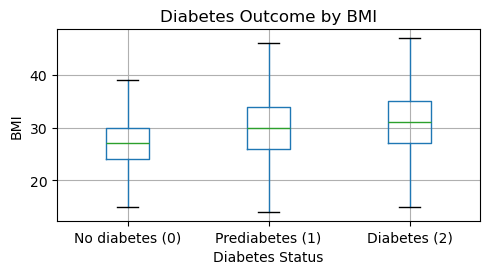

Diabetes_012       0     1      2
HighBP                           
0             134391  1718   8742
1              79312  2913  26604
Diabetes_012         0         1         2
HighBP                                    
0             0.927788  0.011860  0.060352
1             0.728776  0.026767  0.244457


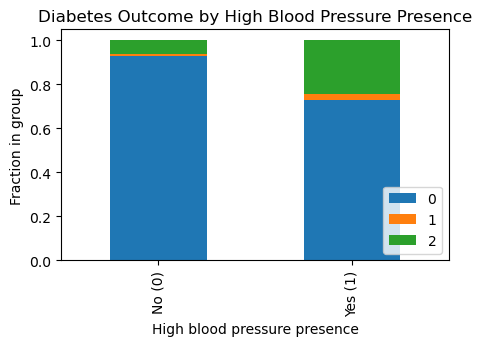

Diabetes_012       0     1      2
HighChol                         
0             132673  1756  11660
1              81030  2875  23686
Diabetes_012         0         1         2
HighChol                                  
0             0.908166  0.012020  0.079814
1             0.753130  0.026722  0.220149


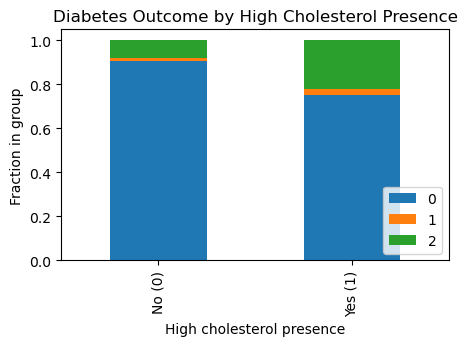

Diabetes_012      0    1     2
Age                           
1              5601   21    78
2              7404   54   140
3             10737   72   314
4             13055  142   626
5             14943  163  1051
6             17765  312  1742
7             22808  418  3088
8             26019  550  4263
9             26809  702  5733
10            24939  697  6558
11            17790  602  5141
12            12132  445  3403
13            13701  453  3209
Diabetes_012         0         1         2
Age                                       
1             0.982632  0.003684  0.013684
2             0.974467  0.007107  0.018426
3             0.965297  0.006473  0.028230
4             0.944440  0.010273  0.045287
5             0.924862  0.010089  0.065049
6             0.896362  0.015742  0.087895
7             0.866763  0.015885  0.117352
8             0.843896  0.017839  0.138265
9             0.806431  0.021117  0.172452
10            0.774647  0.021650  0.203703
11            0.755

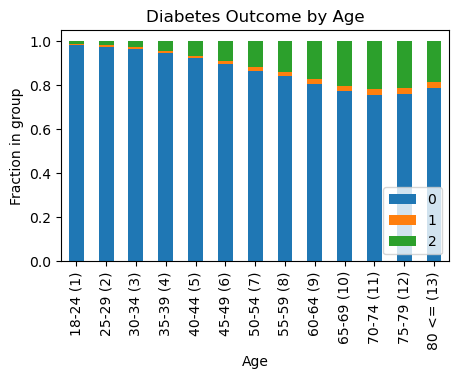

In [6]:
# BMI vs Diabetes_012 (removed outliers)
df[['BMI','Diabetes_012']].boxplot(by='Diabetes_012',figsize=(5,3),showfliers=False)
plt.title('')
plt.suptitle('')
plt.ylabel('BMI')
plt.xlabel('Diabetes Status')
plt.xticks([1,2,3], ['No diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)'])
plt.title('Diabetes Outcome by BMI')
plt.tight_layout()
plt.savefig("BMI_vs_Diabetes.jpg", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

# HighBP vs Diabetes_012
count_matrix = df.groupby(['HighBP', 'Diabetes_012']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Fraction in group')
plt.xlabel('High blood pressure presence')
plt.xticks([0,1], ['No (0)', 'Yes (1)'])
plt.title('Diabetes Outcome by High Blood Pressure Presence')
plt.legend(loc=4)
plt.savefig("BP_vs_Diabetes.jpg", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

# HighChol vs Diabetes_012
count_matrix = df.groupby(['HighChol', 'Diabetes_012']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Fraction in group')
plt.xlabel('High cholesterol presence')
plt.xticks([0,1], ['No (0)', 'Yes (1)'])
plt.title('Diabetes Outcome by High Cholesterol Presence')
plt.legend(loc=4)
plt.show()

# Age vs Diabetes_012
count_matrix = df.groupby(['Age', 'Diabetes_012']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Fraction in group')
plt.xlabel('Age')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ['18-24 (1)', '25-29 (2)', '30-34 (3)', '35-39 (4)', 
                                            '40-44 (5)', '45-49 (6)', '50-54 (7)', '55-59 (8)', '60-64 (9)', 
                                            '65-69 (10)', '70-74 (11)', '75-79 (12)', '80 <= (13)'])
plt.title('Diabetes Outcome by Age')
plt.legend(loc=4)
plt.savefig("Age_vs_Diabetes.jpg", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

## Preprocessing & Splitting

In [6]:
from sklearn.model_selection import StratifiedKFold

# stratified train-test split to deal with class imbalance in target variable
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42)
print('test balance:',np.unique(y_test,return_counts=True))

kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]

    # scale 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

test balance: (array([0, 1, 2]), array([42741,   926,  7069]))
new fold
(array([0, 1, 2]), array([128221,   2779,  21208]))
(array([0, 1, 2]), array([42741,   926,  7069]))
new fold
(array([0, 1, 2]), array([128221,   2779,  21208]))
(array([0, 1, 2]), array([42741,   926,  7069]))
new fold
(array([0, 1, 2]), array([128222,   2779,  21207]))
(array([0, 1, 2]), array([42740,   926,  7070]))
new fold
(array([0, 1, 2]), array([128222,   2778,  21208]))
(array([0, 1, 2]), array([42740,   927,  7069]))
